<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Objectives" data-toc-modified-id="Objectives-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Objectives</a></span></li><li><span><a href="#Decision-Trees-at-a-High-Level" data-toc-modified-id="Decision-Trees-at-a-High-Level-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Decision Trees at a High Level</a></span><ul class="toc-item"><li><span><a href="#Simple-Example-of-a-Decision-Tree" data-toc-modified-id="Simple-Example-of-a-Decision-Tree-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Simple Example of a Decision Tree</a></span><ul class="toc-item"><li><span><a href="#Picturing-Decisions-as-a-Tree" data-toc-modified-id="Picturing-Decisions-as-a-Tree-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Picturing Decisions as a Tree</a></span></li></ul></li><li><span><a href="#Overview-of-Algorithm's-Steps" data-toc-modified-id="Overview-of-Algorithm's-Steps-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Overview of Algorithm's Steps</a></span></li></ul></li><li><span><a href="#Entropy/Information-Gain-and-Gini" data-toc-modified-id="Entropy/Information-Gain-and-Gini-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Entropy/Information Gain and Gini</a></span><ul class="toc-item"><li><span><a href="#Entropy" data-toc-modified-id="Entropy-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Entropy</a></span><ul class="toc-item"><li><span><a href="#Information-Gain" data-toc-modified-id="Information-Gain-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Information Gain</a></span></li></ul></li><li><span><a href="#Gini-Impurity" data-toc-modified-id="Gini-Impurity-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Gini Impurity</a></span></li></ul></li><li><span><a href="#With-sklearn" data-toc-modified-id="With-sklearn-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>With <code>sklearn</code></a></span><ul class="toc-item"><li><span><a href="#Setting-up-Data" data-toc-modified-id="Setting-up-Data-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Setting up Data</a></span></li><li><span><a href="#Training-the-Model" data-toc-modified-id="Training-the-Model-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Training the Model</a></span></li><li><span><a href="#Predictions-and-Evaluation" data-toc-modified-id="Predictions-and-Evaluation-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Predictions and Evaluation</a></span></li></ul></li><li><span><a href="#Important-Terminology-Related-to-Decision-Trees" data-toc-modified-id="Important-Terminology-Related-to-Decision-Trees-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Important Terminology Related to Decision Trees</a></span></li><li><span><a href="#Challenges-with-Decision-Trees" data-toc-modified-id="Challenges-with-Decision-Trees-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Challenges with Decision Trees</a></span><ul class="toc-item"><li><span><a href="#Decision-Trees-are-Prone-to-Overfitting" data-toc-modified-id="Decision-Trees-are-Prone-to-Overfitting-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Decision Trees are Prone to Overfitting</a></span></li><li><span><a href="#Bias-Variance-with-Decision-Trees" data-toc-modified-id="Bias-Variance-with-Decision-Trees-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Bias-Variance with Decision Trees</a></span><ul class="toc-item"><li><span><a href="#Stopping-Criterion---Pruning-Parameters" data-toc-modified-id="Stopping-Criterion---Pruning-Parameters-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>Stopping Criterion - Pruning Parameters</a></span></li></ul></li></ul></li><li><span><a href="#Feature-Importances" data-toc-modified-id="Feature-Importances-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Feature Importances</a></span></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Conclusions</a></span><ul class="toc-item"><li><span><a href="#Pros" data-toc-modified-id="Pros-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Pros</a></span></li><li><span><a href="#Cons" data-toc-modified-id="Cons-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Cons</a></span></li></ul></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, plot_roc_curve, plot_confusion_matrix
from sklearn.datasets import load_iris

%matplotlib inline

# Objectives

- Describe the decision tree modeling algorithm
- Use attribute selection methods to build different trees
- Explain the pros and cons of decision trees
- Interpret the feature importances of a fitted model

# Decision Trees at a High Level

> **Decision trees** are a supervised learning model that uses past data to form a graph/pathway which leads to the model making _decisions_ on its predictions.

I like to think of decision trees as a bunch of forks in the road.

<a title="Jonathan Billinger / Fork in the road" href="https://commons.wikimedia.org/wiki/File:Fork_in_the_road_-_geograph.org.uk_-_1355424.jpg"><img width="512" alt="Fork in the road - geograph.org.uk - 1355424" src="https://upload.wikimedia.org/wikipedia/commons/7/71/Fork_in_the_road_-_geograph.org.uk_-_1355424.jpg"></a>

Every time we make a decision, we split up, or *partition*, the data based on the features.

## Simple Example of a Decision Tree

Let's say we have this set of data:

Work Status |  Age  | Favorite Website
------------|-------|-------------------------
 Student    | Young | A
 Working    | Young | B
 Working    | Old   | C
 Working    | Young | B
 Student    | Young | A
 Student    | Young | A



This can help us answer a couple questions:

- If someone is a young worker, what website do we recommend?
- If someone is an old worker, what website then?

### Picturing Decisions as a Tree

![](images/simple_decision_tree.png)

> Note our tree would look different depending on where we made our decisions.

## Overview of Algorithm's Steps

> Here's a great visual of a decision tree  http://www.r2d3.us/visual-intro-to-machine-learning-part-1/

1. Organize data features and target
2. Make a *decision* (a split) based on some *metric* using the features
    * Data are split into partitions via *branches*
3. Continue on with each partition, and do more splits for each using the features in that partition
4. Keep doing that until a **stopping condition** is hit
    - Number of data points in a final partition
    - Layers deep
5. To make predictions, run through the decision nodes (the forks in the road)

Now we have to determine what metric we use to make our split/decision!

# Entropy/Information Gain and Gini

The goal is to have our ultimate classes be fully "ordered" (for a binary dependent variable, we'd have the 1's in one group and the 0's in the other).

![](images/information_gain_split.png)

One way to assess the value of a split is to measure how *disordered* our groups are, and there is a notion of *entropy* that measures precisely this.

## Entropy

The entropy of the whole dataset is given by:

$\large E = -\Sigma^n_i p_i\log_2(p_i)$,

where $p_i$ is the probability of belonging to the $i$th group, where $n$ is the number of groups (i.e. target values).

**Entropy will always be between 0 and 1. The closer to 1, the more disordered your group.**

### Information Gain

To calculate the entropy of a *split*, we're going to want to calculate the entropy of each of the groups made by the split, and then calculate a weighted average of those groups' entropies––weighted, that is, by the size of the groups.

For a given split, the **information gain** is simply the entropy of the parent group less the entropy of the split.

> We can essentially say **information gain** is the **_difference_** of the **parent's entropy** and the **_average_** of the **children's entropy**

For a given parent, then, we maximize our model's performance by *minimizing* the split's entropy.

What we'd like to do then is:

1. Look at the entropies of all possible splits
2. Choose the split with the lowest entropy

In practice there are far too many splits for it to be practical for a person to calculate all these different entropies ...

... but we can make computers do these calculations for us!

Moreover, we can **iterate** this algorithm on the resultant groups until we reach pure groups!

-----

**Question**: Are we in fact guaranteed, proceeding in this way, to reach pure groups, no matter what our data looks like?

**Observation**: This algorithm looks for the best split **locally**. There is no regard for how an overall tree might look. That's what makes this algorithm ***greedy***.

## Gini Impurity

An alternative metric to entropy comes from the work of Corrado Gini. The Gini Impurity is defined as:

$\large G = 1 - \Sigma_ip_i^2$, or, equivalently, $\large G = \Sigma_ip_i(1-p_i)$.

where, again, $p_i$ is the probability of belonging to the $i$th group.

**Gini Impurity will always be between 0 and 0.5. The closer to 0.5, the more disordered your group.**

# With `sklearn`


## Setting up Data

In [26]:
iris = load_iris() 
print(iris.target_names)
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [27]:
# petal length and width features
# petal length and width features
feature_used = iris.feature_names[2:]
X = iris.data[:, 2:] 
y = iris.target 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

X_train.shape, X_test.shape

((120, 2), (30, 2))

## Training the Model

> Check out the [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) documentation

In [28]:
# Instantiate and fit

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)

In [29]:
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

## Predictions and Evaluation

In [30]:
# create tree plot

y_preds = tree_clf.predict(X_test)
y_preds

array([0, 0, 2, 0, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 2, 1,
       2, 1, 1, 0, 0, 2, 0, 2])

In [31]:
acc = accuracy_score(y_test, y_preds)
acc

0.9333333333333333

In [32]:
tree_clf.score(X_test, y_test)

0.9333333333333333

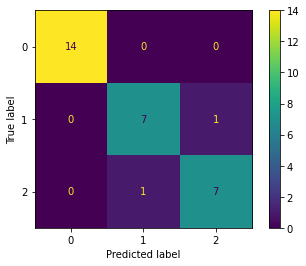

In [33]:
plot_confusion_matrix(tree_clf, X_test, y_test)

[Text(223.2, 453.0, 'sepal length (cm) <= 2.35\ngini = 0.665\nsamples = 120\nvalue = [36, 42, 42]'),
 Text(111.6, 271.8, 'gini = 0.0\nsamples = 36\nvalue = [36, 0, 0]'),
 Text(334.79999999999995, 271.8, 'sepal width (cm) <= 1.65\ngini = 0.5\nsamples = 84\nvalue = [0, 42, 42]'),
 Text(223.2, 90.59999999999997, 'gini = 0.127\nsamples = 44\nvalue = [0, 41, 3]'),
 Text(446.4, 90.59999999999997, 'gini = 0.049\nsamples = 40\nvalue = [0, 1, 39]')]

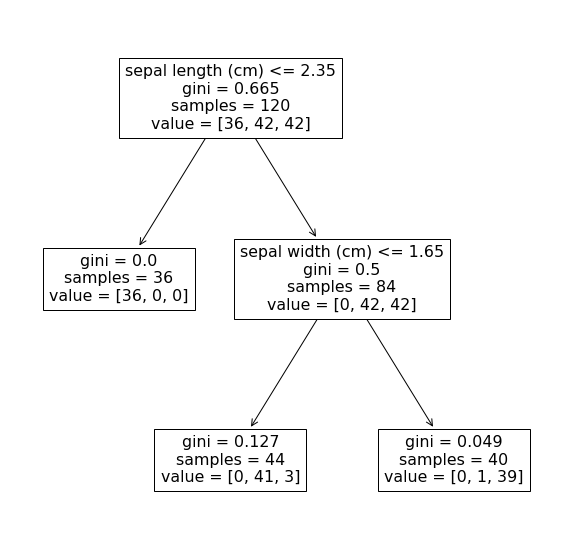

In [34]:
f, ax = plt.subplots(figsize=(10,10))
plot_tree(tree_clf, ax=ax, feature_names=iris.feature_names)

# Important Terminology Related to Decision Trees

- **Root Node:** Represents entire population or sample.
- **Decision Node:** Node that is split.
- **Leaf/ Terminal Node:** Node with no children.
- **Pruning:** Removing nodes.
- **Branch / Sub-Tree:** A sub-section of a decision tree.
- **Parent and Child Node:** A node divided into sub-nodes is the parent; the sub-nodes are its children.

<img src='./images/decision_leaf.webp' width=600 />

# Challenges with Decision Trees

## Decision Trees are Prone to Overfitting

In [17]:
# Using more data features this time, and TTS
feature_used = iris.feature_names[:]
X = iris.data[:, :]
y = iris.target 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

X_train.shape, X_test.shape

((120, 4), (30, 4))

In [18]:
# Allow it to run the full default hyperparameters
tree_clf = DecisionTreeClassifier()

In [19]:
# Metrics
tree_clf.fit(X_train, y_train)
tree_clf.score(X_train, y_train)

1.0

In [ ]:
# It's overfit! everything has it's own bucket(leaf node)

In [20]:
tree_clf.score(X_test, y_test)

0.9333333333333333

## Bias-Variance with Decision Trees

The CART algorithm will repeatedly partition data into smaller and smaller subsets until those final subsets are homogeneous in terms of the outcome variable. In practice this often means that the final subsets (known as the leaves of the tree) each consist of only one or a few data points. 

This tends to result in low-bias, high variance models.

In [21]:
# Allow it to run the full default hyperparameters
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

# Accuracy on training data & test data
print('Training:', tree_clf.score(X_train, y_train))
print('Testing:', tree_clf.score(X_test, y_test))

Training: 1.0
Testing: 0.9333333333333333


### Stopping Criterion - Pruning Parameters

The recursive binary splitting procedure described above needs to know when to stop splitting as it works its way down the tree with the training data.

**min_samples_leaf:**  The most common stopping procedure is to use a minimum count on the number of training instances assigned to each leaf node. If the count is less than some minimum then the split is not accepted and the node is taken as a final leaf node.

**max_leaf_nodes:** 
Reduce the number of leaf nodes.

**max_depth:**
Reduce the depth of the tree to build a generalized tree.

**min_impurity_decrease:**
A node will split if the impurity decrease in the split is above the threshold, otherwise it will be a leaf.

In [22]:
# Stop it from running too long
tree_clf = DecisionTreeClassifier(min_impurity_decrease=0.3, random_state=42)
tree_clf.fit(X_train, y_train)

# Accuracy on training data & test data
print('Training:', tree_clf.score(X_train, y_train))
print('Testing:', tree_clf.score(X_test, y_test))

Training: 0.65
Testing: 0.7333333333333333


# Feature Importances

The fitted tree has an attribute called `ct.feature_importances_`. What does this mean? Roughly, the importance (or "Gini importance") of a feature is a sort of weighted average of the impurity decrease at internal nodes that make use of the feature. The weighting comes from the number of samples that depend on the relevant nodes.

> The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance. See [`sklearn`'s documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.feature_importances_).

In [35]:
# Catch them all!

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X,y)

DecisionTreeClassifier(random_state=42)

More on feature importances [here](https://towardsdatascience.com/the-mathematics-of-decision-trees-random-forest-and-feature-importance-in-scikit-learn-and-spark-f2861df67e3).

In [36]:
# check out the plot
dt.feature_importances_

array([0.57167834, 0.42832166])

In [37]:
for fi, feature in zip(dt.feature_importances_, iris.feature_names):
    print(fi, feature)

0.5716783359446403 sepal length (cm)
0.4283216640553596 sepal width (cm)


# Conclusions

- The decision tree is a "white-box" type of ML algorithm. It shares internal decision-making logic, which is not available in the black-box type of algorithms such as Neural Network.
- Its training time is faster compared to other algorithms such as neural networks.
- The decision tree is a non-parametric method, which does not depend upon probability distribution assumptions.
- Decision trees can handle high-dimensional data with good accuracy.

## Pros

- Easy to interpret and visualize
- Can easily capture non-linear patterns
- Require little data preprocessing from the user (no need to normalize data)
- Can be used for feature engineering such as variable selection and predicting missing values 
- Make no assumptions about distribution because its non-parametric

## Cons

- Sensitive to noisy data (overfit)
- Trouble with imbalanced datasets